In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab10.ipynb")

## Conditional Probability

This lab is an introduction to conditional probabilities.  

The lab includes a visualization called an *icon array*. It's meant to be an instructional part of the lab to help build intuitions about conditional probability.  These visualizations do not appear in the textbook.

In [2]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# This line loads the visualization code for this lab.
import visualizations


# 1. What is conditional probability good for?

Suppose we have a known population, like all dogs in California.  So far, we've seen 3 ways of *predicting* something about an individual in that population, given incomplete knowledge about the identity of the individual:

* If we know nothing about the individual dog, we could predict that its speed is the *average* or *median* of all the speeds in the population.
* If we know the dog's height but not its speed, we could use *linear regression* to predict its speed from its height.  The resulting prediction is still imperfect, but it might be more accurate than the population average.
* If we know the dog's breed, height, and age, we could use *nearest-neighbor classification* (or *multiple regression*) to predict its speed by comparing it to a collection of dogs with known speed.


We can also compute conditional probabilities to make predictions about individuals or events. This technique is different from the previous methods we’ve examined because 

1. our prediction for each outcome is described by a probability, and 
2. each probability can be exactly calculated from assumptions, as opposed to estimated from data.

# 2. Icon arrays
Parts 3 and 4 of this lab work with a more complex example about disease, but first, let's start with a simple example.

Imagine you are a marble.  You don't know what you look like (since you obviously have no eyes), but you know that Samantha drew you **uniformly at random** from a bag that contained the following marbles:
* 4 large shiny marbles,
* 1 large dull marble,
* 6 small shiny marbles, and
* 2 small dull marbles.

**Question 2.0.1.** Knowing only what we've told you so far, what's the probability that you're a large shiny marble?

<!--
BEGIN QUESTION
name: q2_0_1
-->

In [3]:
probability_large_shiny = ...

In [4]:
grader.check("q2_0_1")

q2_0_1 results:
    q2_0_1 - 1 result:
        Trying:
            np.isclose(probability_large_shiny, 4/13)
        Expecting:
            True
        **********************************************************************
        Line 1, in q2_0_1 0
        Failed example:
            np.isclose(probability_large_shiny, 4/13)
        Exception raised:
            Traceback (most recent call last):
              File "/usr/lib/python3.8/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2_0_1 0[0]>", line 1, in <module>
                np.isclose(probability_large_shiny, 4/13)
              File "<__array_function__ internals>", line 180, in isclose
              File "/home/shaolin/Documents/Teaching/2022/cs2065/virtual-env/lib/python3.8/site-packages/numpy/core/numeric.py", line 2358, in isclose
                xfin = isfinite(x)
            TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Here's a table with those marbles:

In [5]:
marbles = Table.read_table("marbles.csv")
marbles.show()

surface,size
shiny,large
shiny,large
shiny,large
shiny,large
dull,large
shiny,small
shiny,small
shiny,small
shiny,small
shiny,small


Here are the counts of each type of marble in a pivot table.

In [6]:
marbles.pivot('surface', 'size')

/home/shaolin/Documents/Teaching/2022/cs2065/virtual-env/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


size,dull,shiny
large,1,4
small,2,6


Here are all the different combinations of surface and size, with the count for each surface-size combination. Each type of marble appears in its own row.

In [7]:
marbles.group(['surface', 'size'])

surface,size,count
dull,large,1
dull,small,2
shiny,large,4
shiny,small,6


We've included some code to display something called an *icon array*.  The functions in the cell below create icon arrays from various kinds of tables. Don't worry about understanding the code; just run this cell.

In [8]:
# Run this cell.

#######################################################################
# The functions you'll need to actually use are in here.  Each is a
# way of making an icon array from a differently-formatted table.
#######################################################################

def display_icon_array(table, groups, individuals_name):
    """
    Given a table and some columns to group it on, displays an icon array
    of the groups.
    
    groups should be an array of labels of columns in table.
    
    individuals_name is your name for the individual rows of table.
    For example, if we're talking about a population of people,
    individuals_name should be "people".
    
    For example:
    
    display_icon_array(marbles, ["surface", "size"], "marbles")
    """
    display_grouped_icon_array(table.group(groups), individuals_name)

def display_grouped_icon_array(grouped_data, individuals_name):
    """
    Given a table with counts for data grouped by 1 or more categories,
    displays an icon array of the groups represented in the table.
    
    grouped_data should be a table of frequencies or counts, such as
    a table created by calling the groups method on some table.
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_grouped_icon_array(marbles.group(["surface", "size"]), "marbles")
    """
    visualizations.display_combinations(grouped_data, individuals_name=individuals_name)

def display_crosstab_icon_array(crosstabulation, x_label, individuals_name):
    """
    Given a crosstabulation table, displays an icon array of the groups
    represented in the table.
    
    crosstabulation should be a table of frequencies or counts created by
    calling pivot on some table.
    
    x_label should be the label of the categories listed as columns (on
    the "x axis" when the crosstabulation table is printed).
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_crosstab_icon_array(marbles.pivot("surface", "size"), "surface", "marbles")
    """
    display_grouped_icon_array(visualizations.pivot_table_to_groups(crosstabulation, x_label), individuals_name)

Here's an icon array of all the marbles, grouped by surface and size:

/home/shaolin/Documents/Teaching/2022/cs2065/virtual-env/lib/python3.8/site-packages/datascience/tables.py:475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([fn(*row) for row in rows])


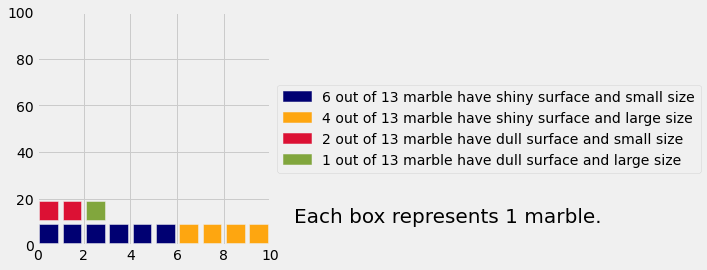

In [9]:
# Run this cell.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

You (the marble) should imagine that you are a random draw from these 13 icons.

The following is an icon array of the marbles, grouped **only by their surface (shiny/dull)**.

In [10]:
display_grouped_icon_array(marbles.group("surface"), "marble")

Knowing nothing else about yourself, you're equally likely to be any of the marbles pictured.

**Question 2.0.2.** What's the probability that you're a shiny marble?  Calculate this by hand (using Python for arithmetic) by looking at your icon array.

<!--
BEGIN QUESTION
name: q2_0_2
-->

In [11]:
probability_shiny = ...

In [ ]:
grader.check("q2_0_2")

## 2.1. Conditional probability

Suppose you overhear Samantha say that you're a large marble. Does this somehow change the chance that you're shiny?  Let's find out.

Go back to the full icon array, displayed below for convenience.

In [13]:
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

In question 2.0.2, we assumed you were equally likely to be any of the marbles, because we didn't know any better.  That's why we looked at all the marbles to compute the probability that you were shiny.

But assuming that you're a large marble, we can eliminate some of these possibilities.  In particular, you can't be a small shiny marble or a small dull marble.

You're still equally likely to be any of the remaining marbles, because you don't know any other information.  So here's an icon array of those remaining possibilities:

In [14]:
# Just run this cell.
display_grouped_icon_array(marbles.where("size", "large").group("surface"), "large marble")

**Question 2.1.1.** What's the probability you're a shiny marble, knowing that you're a large marble? 

*Hint: Use the icon array*

<!--
BEGIN QUESTION
name: q2_1_1
-->

In [15]:
probability_shiny_given_large = ...

In [ ]:
grader.check("q2_1_1")

You should have found that this is different from the probability that you're a shiny marble given no size information) which you computed earlier.  The distribution of surfaces among the large marbles is a little different from the distribution of surfaces among all the marbles.

**Question 2.1.2.** Suppose instead Samantha had said you're a **shiny** marble (hooray!). What's the probability that you're large? 

Run the code cell below to display the icon array, then assign `probability_large_given_shiny` to the appropriate value.
<!--
BEGIN QUESTION
name: q2_1_2
-->

In [17]:
# Run this cell to display the icon array. Then fill in the last line.
display_grouped_icon_array(marbles.where("surface", "shiny").group("size"), "shiny marble")

# Now fill in the answer.
probability_large_given_shiny = ...

In [ ]:
grader.check("q2_1_2")

**Question 2.1.3.** Can you answer the previous two questions just by looking at the full icon array?  (You can run the cell below to see it again.).

In [19]:
# Just run this cell.  The next cell is where you should write your answer.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

<!-- BEGIN QUESTION -->

If you can, how? If not, why not? Check with your lab peers to see if you are on the right track. 

<!--
BEGIN QUESTION
name: q2_1_3
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



# 3. Cancer screening
Hopefully the icon arrays from the previous portion helped you build intuition for why conditional probabilities can be helpful. Now, let’s look at a real life application.

### Background
Medical tests are an important but surprisingly controversial topic.  For years, women have been advised to get regular mammograms, which test for breast cancer.  Today, there is controversy over whether the tests are useful at all.

Part of the problem with such tests is that they are not perfectly reliable.  Someone without cancer, or with only a benign form of cancer, can see a positive result on a test for cancer.  Someone with cancer can receive a negative result.  ("Positive" means "pointing toward cancer," so in this context it's bad!)  Doctors and patients often deal poorly with the first case, called *false positives*.  For example, a patient may receive dangerous treatment like chemotherapy or radiation despite having no cancer or, as happens more frequently, having a cancer that would not have impacted their health.

Conditional probability is a good way to think about such situations.  For example, you can compute the chance that you have cancer **given the results of a diagnostic test** by combining information from different probability distributions.  You'll see that the chance you have cancer can be far from 100% even if you have a positive test result from a test that is usually accurate.

## 3.1. Basic cancer statistics
Suppose that in a representative group of 10,000 people who are tested for cancer ("representative" meaning that the frequencies of different events are the same as the frequencies in the whole population):
1. 100 people have cancer.
2. Among the 100 people that have cancer, 90 have positive results on a cancer test and 10 have negative results.  ("Negative" means "not pointing toward cancer.")
3. The other 9,900 people don't have cancer.
4. Among these 9,900 people, 198 have positive results on a cancer test and the other 9,702 have negative results.  (So 198 see "false positive" results.)

Below we've generated a table with data from these 10,000 hypothetical people.

In [20]:
people = Table().with_columns(
    "cancer status", ["sick", "sick", "healthy", "healthy"],
    "test status", ["positive", "negative", "positive", "negative"],
    "count", [90, 10, 198, 9702])
people

One way to visualize this dataset is with a contingency table, which you've seen before.

**Question 3.1.1.** Create a contingency table that looks like this:

|cancer status|negative|positive|
|-|-|-|
|healthy|||
|sick||||

...with the **count** of each group filled in, according to what we've told you above.  The counts in the 4 boxes should sum to 10,000.

*Hint:* Use `pivot` with the `sum` function.

<!--
BEGIN QUESTION
name: q3_1_1
-->

In [21]:
cancer = ...
cancer

In [ ]:
grader.check("q3_1_1")

Here is the `people` data in an icon array.

In [24]:
display_grouped_icon_array(people, "people who've taken a cancer test")

Now let's think about how you can use this kind of information when you're tested for cancer.

Before you know any information about yourself, you could imagine yourself as a **uniform random sample** of one of the 10,000 people in this imaginary population of people who have been tested.

What's the chance that you have cancer, knowing nothing else about yourself?  It's $\frac{100}{10000}$, or 1%.  We can see that more directly with this icon array:

In [25]:
by_health = people.select(0, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_health, "people who've taken a cancer test")

**Question 3.1.2.** What's the chance that you have a positive test result, knowing nothing else about yourself?
Run the next code cell to dispaly an icon array, then assign `probability_positive_test` to this value.
<!--
BEGIN QUESTION
name: q3_1_2
-->

In [26]:
# Run this cell to display an icon array. Then fill in the probability of a positive test result in the last line.
by_test = people.select(1, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_test, "people who've taken a cancer test")

# Now fill in the probability of a positive test result
probability_positive_test = ...

In [ ]:
grader.check("q3_1_2")

## 3.2. Interpreting test results
Suppose you have a positive test result.  This means that you can now narrow yourself down to being part of just one of the two following groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

Here's an icon array for those two groups:

In [28]:
# Just run this cell.
display_grouped_icon_array(people.where("test status", are.equal_to("positive")).drop(1), "people who have a positive test result")

The *conditional probability* that you **have cancer given your positive test result** is the chance that you're in the first group (cancer), assuming you have a positive test result.

**Question 3.2.1.** Eyeballing the icon array above, is the conditional probability that you have cancer **given your positive test result** closest to:

1. 9/10

2. 2/3

3. 1/2

4. 1/3

5. 1/100

Assign `rough_prob_sick_given_positive` to the number corresponding to your answer.

<!--
BEGIN QUESTION
name: q3_2_1
-->

In [29]:
# Set this to one of the probabilities above.
rough_prob_sick_given_positive = ...

In [ ]:
grader.check("q3_2_1")

**Question 3.2.2.** Now write code to calculate that probability exactly, using the original contingency table you wrote (the `cancer` table).

Run the next code cell to see the `cancer` table, then fill in `prob_sick_given_positive` with your code.

<!--
BEGIN QUESTION
name: q3_2_2
-->

In [31]:
prob_sick_given_positive = ...
prob_sick_given_positive

# Run this cell first to see the cancer table. Then fill in the first line of this cell.
print(cancer)

print('Probability of cancer given positive test result: {}'.format(prob_sick_given_positive))

In [ ]:
grader.check("q3_2_2")

<!-- BEGIN QUESTION -->

**Question 3.2.3.** Look at the full icon array again.  Using that, how would you compute the conditional probability of cancer given a positive test?

Run the next code cell to see the full icon array. 

<!--
BEGIN QUESTION
name: q3_2_3
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

In [33]:
# The full icon array is given here for your convenience.
# Write your answer in the previous cell.
display_grouped_icon_array(people, "people who've taken a cancer test")

<!-- BEGIN QUESTION -->

**Question 3.2.4.** Is your answer to question 3.2.2 bigger than the overall proportion of people in the population who have cancer (given as 1% in 3.1.1)?  Does that make sense? Check with your peers in lab to see if you have the right idea. 

<!--
BEGIN QUESTION
name: q3_2_4
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

# 4. Tree diagrams
A tree diagram is another useful visualization that helps us calculate conditional probabilities.  It is easiest to draw a tree diagram when the probabilities are presented in a slightly different way - specifically, we first look at the probabilities of cancer in the entire population, and then examine the rates of positive test results within the cancer and no cancer groups.  For example, people often summarize the information in your `cancer` table using 3 numbers:

1. The overall probability of having cancer is **`p_cancer`**.  (This is called the *base rate* or *marginal probability* of the disease.)
2. Given that you have cancer, the probability of a positive test result is **`p_pos_given_cancer`**.  (This is called the *sensitivity* of the test.  Higher values of `p_pos_given_cancer` mean the test is more useful.)
3. Given that you don't have cancer, the probability of a positive test result is **`p_pos_given_nocancer`**.  (This is called the *false positive rate* of the test.  Higher values of `p_pos_given_nocancer` mean the test is less useful.)

You already saw that the base rate of cancer was .01 in the previous section.  `p_pos_given_cancer` and `p_pos_given_nocancer` can be computed using the same method you used to compute the conditional probability of cancer given a positive test result.

The information we have on cancer can be represented in this tree diagram:

                      /    \
                 .99 /      \ .01
                    /        \ 
                   /          \
              no cancer      cancer
                / \            / \
           0.1 /   \ 0.9  0.98/   \ 0.02
              /     \        /     \
             +       -      +       -
             
**Question 4.1.** Compute `p_pos_given_cancer` and `p_pos_given_nocancer` for the data in section 3.  

*Hint:* Use Bayes' Rule. For your reference, chapter 18.1 of the textbook has a section on [tree diagrams](https://www.inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html#tree-diagram) and [Bayes' Rule](https://www.inferentialthinking.com/chapters/18/1/More_Likely_than_Not_Binary_Classifier.html#bayes-rule).

<!--
BEGIN QUESTION
name: q4_1
-->

In [34]:
# Hint: You may find these two tables useful:
has_cancer = cancer.where("cancer status", are.equal_to("sick"))
no_cancer = cancer.where("cancer status", are.equal_to("healthy"))

p_cancer = .01
p_pos_given_cancer = ...
p_pos_given_nocancer = ...

print('Probability of Cancer:', p_cancer, '\nProbability of a positive test given cancer:', p_pos_given_cancer, 
      '\nProbability of a positive test given no cancer:', p_pos_given_nocancer)

In [ ]:
grader.check("q4_1")

<!-- BEGIN QUESTION -->

**Question 4.2.** What is the difference in assumptions between the first probability in question 4.1 (probability of a positive test given cancer) and the one in question 3.2.2 (probability of cancer given a positive test result)?

What kind of information does each probability tell us?

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



Congratulations, you're done with the final lab!  Be sure to 
- **run all the tests** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **run the last cell to submit your work**,
- and ask one of the staff members to check you off.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()